<a href="https://colab.research.google.com/github/C-3DevO/MORINGA_DS/blob/main/PHASE%200/PHASE_0_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Summary:Premier League Team Stats Analysis (Opta Data)
This project explores Premier League Teams performance using Opta statistics and applies core Python, pandas, NumPy, Seaborn, and matplotlib skills learned in Moringa School Phase 0.

#Objective:
To extract meaningful insights from Premier League Teams data and  reinforce foundational skills in Python programming, data manipulation, and data visualization.

#Key Goals:
- Understand team performance trends  
- Explore relationships between stats like xG,	xGA	 and xGD towards team position
- Create per-90 and efficiency metrics for deeper evaluation  
- Visualize insights using professional data plots  
- Compare teams across key performance indicators (KPIs)

Tools & Libraries:
- Python 3
- Pandas and NumPy ---> Data manipulation and computation  
- matplotlib and Seaborn ---> Data visualization  
- EDA techniques ---> Statistical summaries and exploration


In [4]:
#importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Phase 1: Setup & Exploration

Goal: Understanding the structure of the data

In [5]:
#Loading the data
data_pl = pd.read_csv("/content/premier_league_stats_2024-25.csv")
data_pl.head() # returned the top 5 teams


,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,38,25,9,4,86,41,45,84,2.21,82.2,38.6,43.6,1.15,60324,Mohamed Salah - 29,Alisson,→ Champions League via league finish
1,2,Arsenal,38,20,14,4,69,34,35,74,1.95,59.9,34.4,25.5,0.67,60251,Kai Havertz - 9,David Raya,→ Champions League via league finish
2,3,Manchester City,38,21,8,9,72,44,28,71,1.87,68.1,47.7,20.4,0.54,52756,Erling Haaland - 22,Ederson,→ Champions League via league finish
3,4,Chelsea,38,20,9,9,64,43,21,69,1.82,67.8,47.3,20.5,0.54,39672,Cole Palmer - 15,Robert Sánchez,→ Champions League via league finish
4,5,Newcastle Utd,38,20,6,12,68,47,21,66,1.74,63.8,45.5,18.3,0.48,52187,Alexander Isak - 23,Nick Pope,→ Europa League via league finish


In [6]:
data_pl.tail() # returned the bottom 5 teams //Manchester not included

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
15,16,Wolves,38,12,6,20,54,69,-15,42,1.11,43.7,58.1,-14.5,-0.38,30695,Matheus Cunha - 15,José Sá,NaN
16,17,Tottenham,38,11,5,22,64,65,-1,38,1.00,58.8,63.3,-4.5,-0.12,61127,Brennan Johnson - 11,Guglielmo Vicario,NaN
17,18,Leicester City,38,6,7,25,33,80,-47,25,0.66,32.6,71.9,-39.3,-1.03,31448,Jamie Vardy - 9,Mads Hermansen,Relegated
18,19,Ipswich Town,38,4,10,24,36,82,-46,22,0.58,34.4,72.7,-38.3,-1.01,29742,Liam Delap - 12,Arijanet Muric,Relegated
19,20,Southampton,38,2,6,30,26,86,-60,12,0.32,32.7,84.8,-52.1,-1.37,30882,Paul Onuachu - 4,Aaron Ramsdale,Relegated


In [7]:
# info about the data
data_pl.info() # the data contain 20 rows and 19 columns/ alternative we could use .shape to get this


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               20 non-null     int64  
 1   Squad            20 non-null     object 
 2   MP               20 non-null     int64  
 3   W                20 non-null     int64  
 4   D                20 non-null     int64  
 5   L                20 non-null     int64  
 6   GF               20 non-null     int64  
 7   GA               20 non-null     int64  
 8   GD               20 non-null     int64  
 9   Pts              20 non-null     int64  
 10  Pts/MP           20 non-null     float64
 11  xG               20 non-null     float64
 12  xGA              20 non-null     float64
 13  xGD              20 non-null     float64
 14  xGD/90           20 non-null     float64
 15  Attendance       20 non-null     int64  
 16  Top Team Scorer  20 non-null     object 
 17  Goalkeeper       2

In [8]:
#checking shape
data_pl.shape

(20, 19)

In [9]:
data_pl.describe()
#Includes measures of central tendency for numerical values

,Rk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
count,20.00000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000
mean,10.50000,38.0,14.350000,9.300000,14.350000,55.750000,55.750000,0.000000,52.350000,1.378500,53.905000,53.890000,1.065814e-15,0.001000,40475.550000
std,5.91608,0.0,6.002412,2.867238,6.960603,14.707231,14.421749,27.041878,18.576372,0.488578,13.037617,12.002978,2.329628e+01,0.613033,16886.824694
min,1.00000,38.0,2.000000,5.000000,4.000000,26.000000,34.000000,-60.000000,12.000000,0.320000,32.600000,34.400000,-5.210000e+01,-1.370000,11210.000000
25%,5.75000,38.0,11.000000,7.750000,9.750000,45.500000,45.500000,-11.250000,42.000000,1.110000,45.050000,47.275000,-6.550000e+00,-0.172500,29979.750000
50%,10.50000,38.0,15.000000,9.000000,12.000000,58.000000,52.500000,3.500000,55.000000,1.445000,57.400000,49.600000,2.700000e+00,0.070000,35118.500000
75%,15.25000,38.0,19.250000,10.250000,18.500000,66.000000,62.750000,14.250000,66.000000,1.740000,61.250000,58.500000,1.620000e+01,0.427500,54629.750000
max,20.00000,38.0,25.000000,15.000000,30.000000,86.000000,86.000000,45.000000,84.000000,2.210000,82.200000,84.800000,4.360000e+01,1.150000,73747.000000


2: Data cleaning:
We have 18 columns which do not have null values and the final column(notes) has null values.since it is not important we will replace the null with "No Notes"

In [10]:
data_pl.isnull().mean()*100
#only the column['notes'] has 50% of its values as null

,0
Rk,0.0
Squad,0.0
MP,0.0
W,0.0
D,0.0
L,0.0
GF,0.0
GA,0.0
GD,0.0
Pts,0.0


In [11]:
data_pl['Notes'] = data_pl['Notes'].fillna('No notes')
data_pl_cleaned = data_pl.copy()
data_pl_cleaned.isnull().mean()*100

,0
Rk,0.0
Squad,0.0
MP,0.0
W,0.0
D,0.0
L,0.0
GF,0.0
GA,0.0
GD,0.0
Pts,0.0


In [12]:
#checking the data cleaned now
data_pl_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               20 non-null     int64  
 1   Squad            20 non-null     object 
 2   MP               20 non-null     int64  
 3   W                20 non-null     int64  
 4   D                20 non-null     int64  
 5   L                20 non-null     int64  
 6   GF               20 non-null     int64  
 7   GA               20 non-null     int64  
 8   GD               20 non-null     int64  
 9   Pts              20 non-null     int64  
 10  Pts/MP           20 non-null     float64
 11  xG               20 non-null     float64
 12  xGA              20 non-null     float64
 13  xGD              20 non-null     float64
 14  xGD/90           20 non-null     float64
 15  Attendance       20 non-null     int64  
 16  Top Team Scorer  20 non-null     object 
 17  Goalkeeper       2

No null columns, The columns contain 4 strings(object data type), 5 float type and 10 integer type hence a total of 15 numerical data type.

In [13]:
#let us assign our cleaned data frame to df
df = data_pl_cleaned.copy()
df.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')

In [14]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

It means there are no duplicate rows in our DataFrame

# **Phase 2: Exploratory Data Analysis (EDA)**
*Goal: Find patterns and compare team performance*


   ***2A: Univariate Analysis***
   
Histogram of GF, GA, Pts, xG, xGA
Top 5 and bottom 5 teams by:
    Goals scored (GF)
    Goals conceded (GA)
    Points (Pts)

In [26]:
list1 = df['GF'].tolist()
max(list1)
min(list1)

26

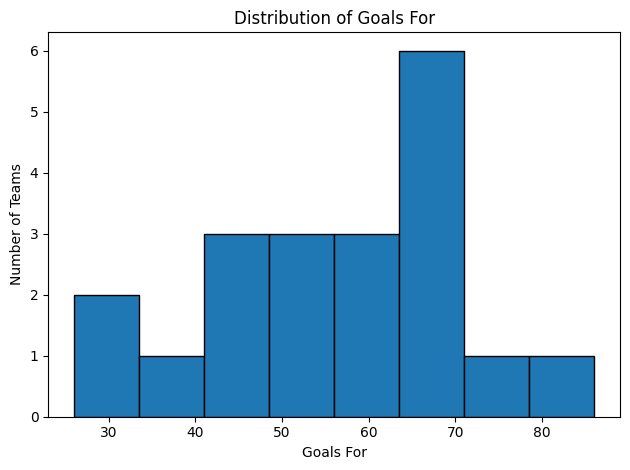

In [27]:
#let us create an histogram of Goals for
plt.hist(df['GF'], bins=8, edgecolor = 'black')
plt.title('Distribution of Goals For')
plt.xlabel('Goals For')
plt.ylabel('Number of Teams')
plt.tight_layout()
plt.show();

Majority of teams have goals for ranging between 41 to 63.5  where our mean and median will likely lie. Also the Goals for is Normally distributed.

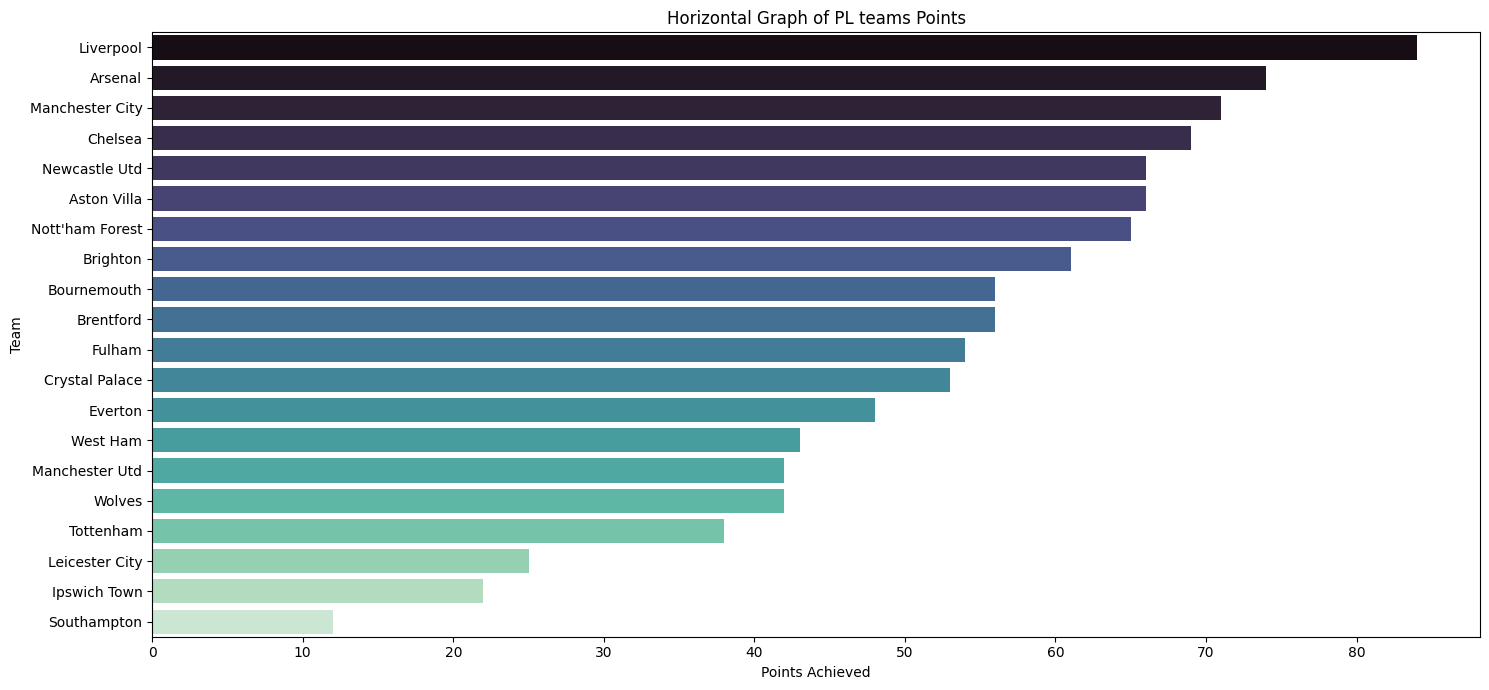

In [29]:
#Let us create an horizontal bar plot for points
plt.figure(figsize = (15,7))
sns.barplot(data=df, x = df['Pts'], y = df['Squad'], hue=df['Squad'], palette = 'mako', orient = 'h')
plt.title('Horizontal Graph of PL teams Points')
plt.xlabel('Points Achieved')
plt.ylabel('Team')
plt.tight_layout()
plt.show();

1.  Liverpool earned the most points — it's at the top with the longest bar.
2.   Arsenal, Man City, and Chelsea closely follow.
1.   Teams are sorted in descending order of points, which
2.   Teams are sorted in descending order of points, which makes comparisons easy.
1.   There's a steep drop-off after the top 5–6 teams, showing a performance gap.






In [36]:
# I want to create another column Category to classify the teams as Top 6, Mid-table(with my great Manchester) and Relegation teams
#First I need to create a function to classify the teams

def classify_team(rank):
  if rank <=6:
    return 'Top 6'
  elif rank >=18:
    return 'Relegation Zone'
  else:
    return 'Mid Table'

df['Category'] = df['Rk'].apply(classify_team)
df.shape #Should return 20 columns and 20 rows since we have added the column 'Category'

(20, 20)

Let us now plot the above horizontal bar plot grouped by category

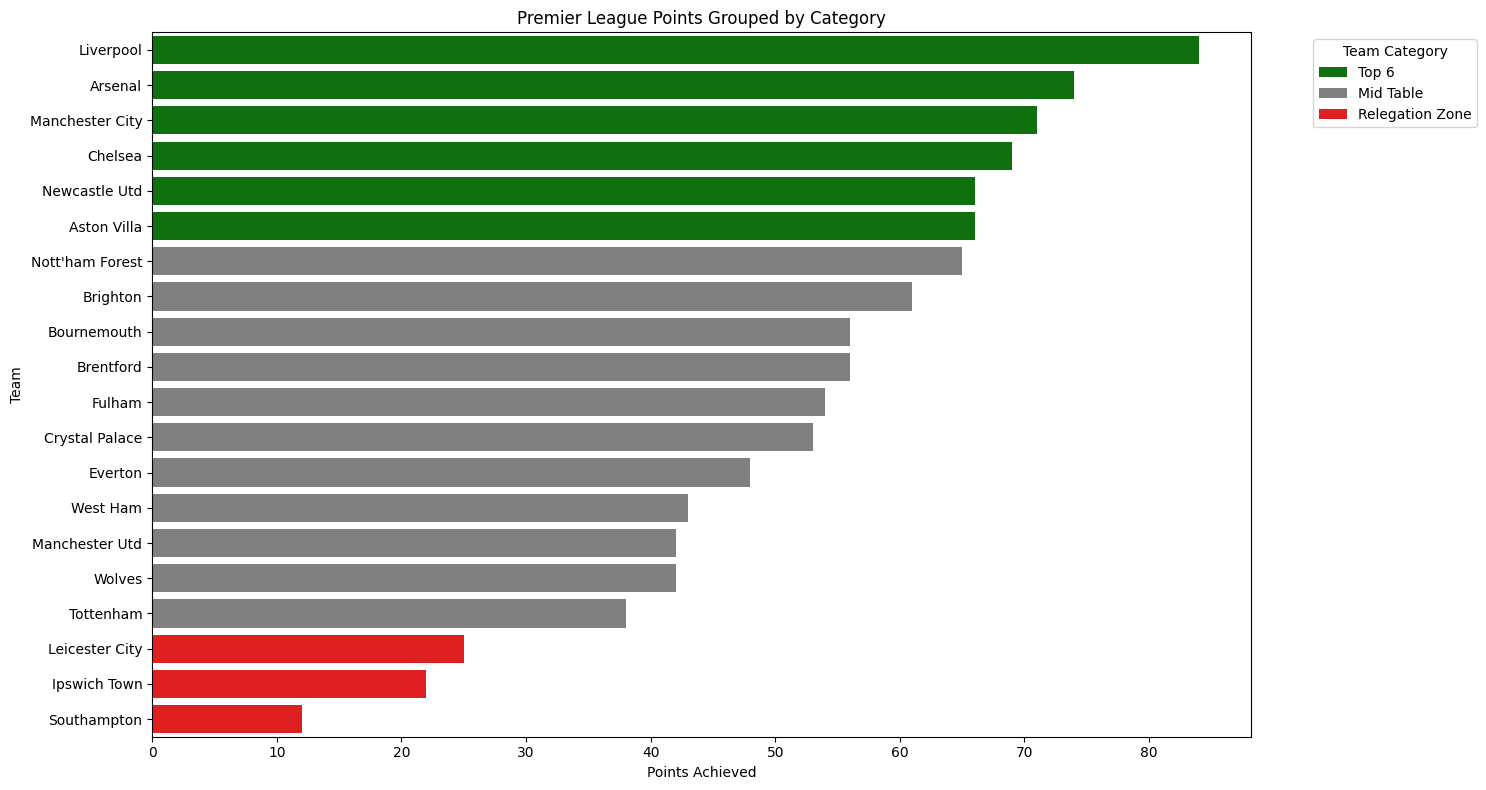

In [38]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data = df,
    x = 'Pts',
    y = 'Squad',
    hue = 'Category',
    dodge = False,
    palette = {'Top 6': 'green', 'Mid Table':'gray', 'Relegation Zone':'red'},
    orient = 'h'
)
plt.title('Premier League Points Grouped by Category')
plt.xlabel('Points Achieved')
plt.ylabel('Team')
plt.legend(title='Team Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();
#This shit looks amazing

  **2B: Bivariate analysis:**

  Correlation matrix (df.corr() + Seaborn heatmap)

  Scatter plots:
    xG vs GF (expected vs. actual goals)
    xGA vs GA (expected vs. actual goals conceded)
    Pts vs xGD (do teams with better expected goal diff have more points?)


***2B.1 #Correlation matrix (df.corr() + Seaborn heatmap)***

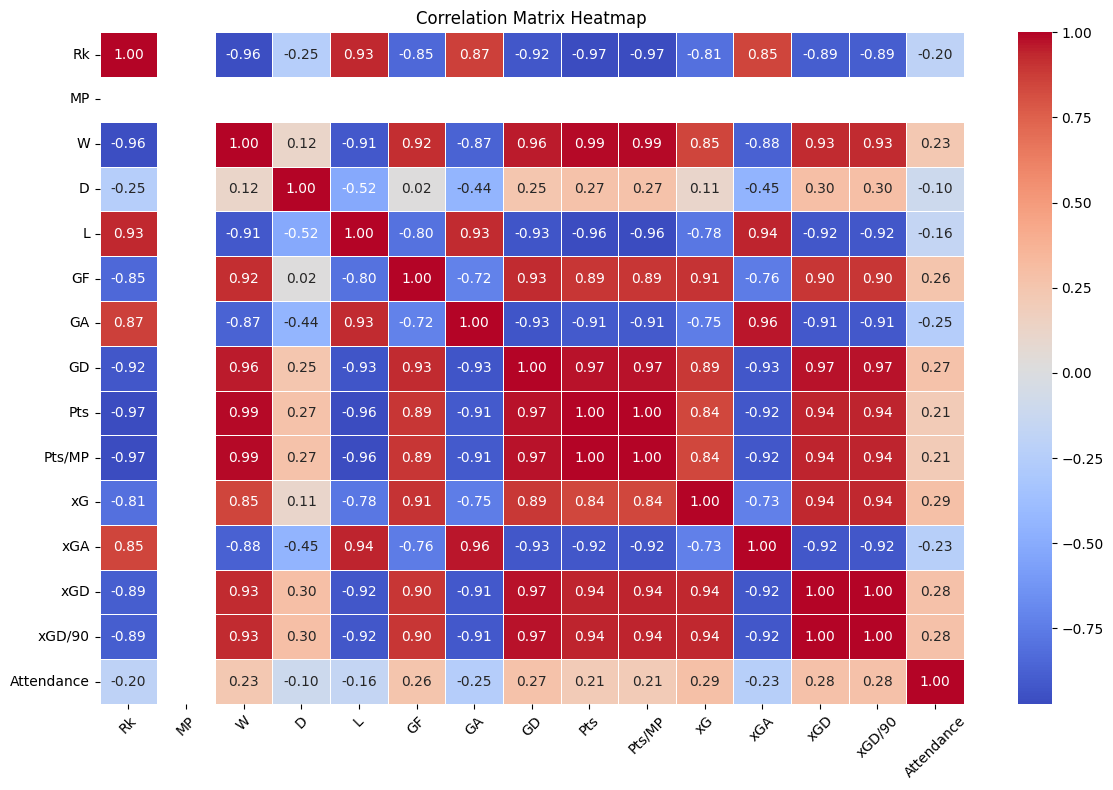

In [42]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot = True,
    fmt ='.2f',
    linewidths= 0.5,
    cmap = 'coolwarm'
)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

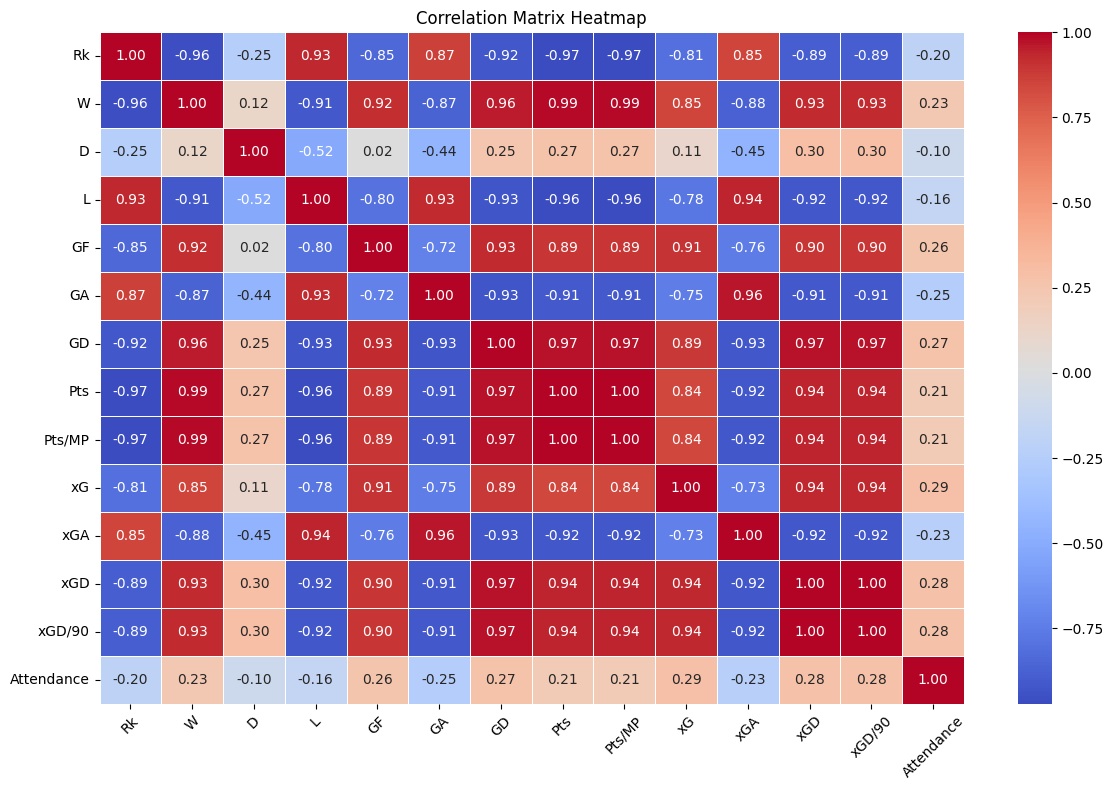

In [43]:
#Avoiding the MP black column by dropping it
corr_matrix = df.drop(columns=['MP']).corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot = True,
    fmt ='.2f',
    linewidths= 0.5,
    cmap = 'coolwarm'
)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Summary of the heatmap**

Each cell above shows correlation between two variables:

Color represents the magnitude and direction of the correlation.
```
  Red represents a strong positive correlation i.e. closer to 1
  Blue represents a strong negative correlation i.e closer to -1
  A reduction in the Shade of the colours Blue and Red show a decreasing association
```
 White-ish show weak or no correlation at all.

 ***Highlights***

 Points is closely related with

    Wins ---> 0.99 correlation
    GD, xGD, xGD/90, xG, GF, Pts/MP ---> are also above 0.9

   Take away -  Better performance leads to more points

    GF and xG: 0.93

   Teams with a higher expected goals tend to score more

 Rank is negatively correlated with:

    Pts: -0.97
    W: -0.96
    xGD, GD: all around -0.9

   Take_away - Lower rank means more wins and points, higher GD and so on.
  
  Attendance has a weak correlation with most performance metrics

    Highest is with xGD/90: ~0.28
    With Pts: ~0.21

   Takeaway - Higher game attendance by fans does not necessarily mean better performance.
   

**2B.2 Scatter plots:**

  xG vs GF (expected vs. actual goals)

  xGA vs GA (expected vs. actual goals conceded)

  Pts vs xGD (do teams with better expected goal diff have more points?)

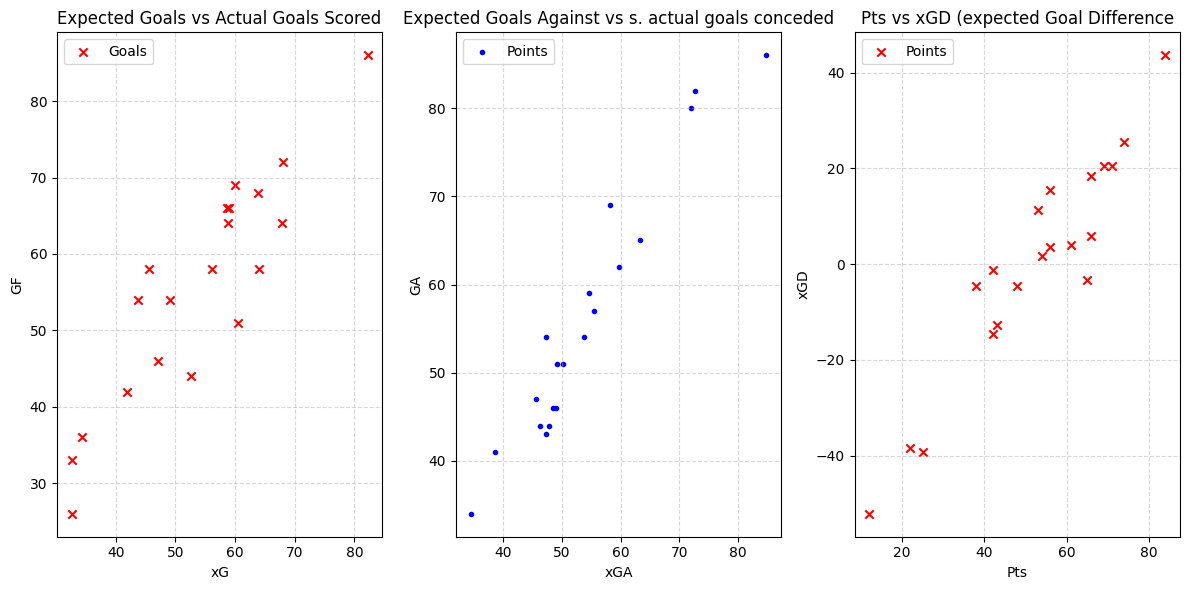

In [65]:
#xG vs GF (expected vs. actual goals)

fig, ax = plt.subplots(1,3, figsize =(12,6))
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]

ax1.scatter(df['xG'],df['GF'],label = 'Goals', color = 'red', marker = 'x')
ax1.set_title("Expected Goals vs Actual Goals Scored")
ax1.set_xlabel('xG')
ax1.set_ylabel('GF')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

#xGA vs GA (expected vs. actual goals conceded)
ax2.scatter(df['xGA'], df['GA'], label = 'Points', color = 'blue', marker ='.')
ax2.set_title('Expected Goals Against vs s. actual goals conceded')
ax2.set_xlabel('xGA')
ax2.set_ylabel('GA')
ax2.grid(True, linestyle = '--', alpha = 0.5)
ax2.legend()

ax3.scatter(df['Pts'], df['xGD'], label = 'Points', color = 'red', marker ='x')
ax3.set_title('Pts vs xGD (expected Goal Difference')
ax3.set_xlabel('Pts')
ax3.set_ylabel('xGD')
ax3.grid(True, linestyle = '--', alpha = 0.5)
ax3.legend()

plt.tight_layout()


 **1. Expected Goals vs Actual Goals Scored (`xG` vs `GF`)**

- **Pattern**: Strong positive correlation — as expected goals (`xG`) increase, actual goals scored (`GF`) tend to increase.
- **Interpretation**: Teams are generally performing in line with expectations in terms of attacking output.
- **Outliers**: Some teams score more or fewer goals than expected

**2. Expected Goals Against vs Actual Goals Conceded (`xGA` vs `GA`)**

- **Pattern**: Also a strong positive correlation.
- **Interpretation**: Most teams are conceding roughly as expected; defensive performance aligns well with `xGA`.
- **Note**: Slight scatter may reveal over/underperforming defenses (e.g. strong goalkeeper effect or poor finishing from opponents).

**3. Points vs Expected Goal Difference (`Pts` vs `xGD`)**

- **Pattern**: Positive correlation — teams with higher expected goal differences (`xGD`) tend to earn more points.
- **Interpretation**: Reflects that goal difference based on expected data is a good indicator of overall team strength.
- **Insights**: Teams outperforming their `xGD` may be efficient or lucky; underperformers might lack finishing or composure under pressure.
